In [1]:
import pandas as pd

In [2]:
df =  pd.read_pickle('df_lyrics_topics.pickle')

## Genre-based topics

In [3]:
df1 = df.iloc[:,-8:].copy()

In [4]:
df['Artist_Nas'] = ['Nas' if i == 'Nas' else 'All Artists' for i in df.artist_name]

In [5]:
df_ranked = df1.rank(axis=1, method='min', ascending=False)
df_ranked = (df_ranked <= 2).astype(int)
df_topics = df[['track_release_year','Artist_Nas']].join(df_ranked)

In [6]:
df_topics = df_topics.groupby(['track_release_year','Artist_Nas']).sum()

In [7]:
df_topics = df_topics.reset_index()
df_topics

,track_release_year,Artist_Nas,Musicality/Flow/Lyricism,Flex/Money,Romance/Feelings,Struggle/Grind/Hustle,Trap/Drug,Violence/Gangster,Party/Sexuality,Feats/Artists/Shoutouts
0,1951,All Artists,1,0,0,1,0,0,0,0
1,1980,All Artists,1,0,0,0,0,0,0,1
2,1982,All Artists,1,0,0,0,1,0,0,0
3,1983,All Artists,1,0,0,1,1,0,1,0
4,1985,All Artists,0,0,0,1,0,0,0,1
5,1986,All Artists,2,1,1,1,1,1,1,2
6,1987,All Artists,0,1,0,3,1,0,3,0
7,1988,All Artists,4,3,4,12,5,2,3,5
8,1989,All Artists,2,1,0,8,3,0,3,1
9,1990,All Artists,6,5,6,16,4,5,4,6


In [8]:
df_topics =  df_topics.iloc[:,:2].join(df_topics.iloc[:,2:].div(df_topics.iloc[:,2:].sum(axis=1), axis=0))

In [9]:
df_topics = df_topics[df_topics.track_release_year > 1989]

In [10]:
df_topics_all = df_topics[df_topics.Artist_Nas != 'Nas']
df_topics_nas = df_topics[df_topics.Artist_Nas == 'Nas']

In [11]:
df_topics_smoothed_all = df_topics_all.rolling(window=5).mean().dropna()

In [12]:
topics = df_topics_smoothed_all.columns[-8:].to_list()

In [14]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.update_layout(yaxis_range=[0,0.5])

for t in topics:
    if t in ['Musicality/Flow/Lyricism','Party/Sexuality','Flex']:
        continue
    fig.add_trace(go.Scatter(x=df_topics_smoothed_all.track_release_year, y=df_topics_smoothed_all[t], name=t,
                    text=["tweak line smoothness<br>with 'smoothing' in line object"],
                    hoverinfo='text+name',
                    line_shape='spline'))
    
fig.update_layout(
    title="Topics Prevalence through the years (Rap)",
    xaxis_title="Year",
    yaxis_title="Relative Freq.")
fig.show()

In [15]:
df_topics_smoothed_nas = df_topics_nas.rolling(window=5).mean().dropna()

import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.update_layout(yaxis_range=[0,0.5])

for t in topics:
    if t in ['Musicality/Flow/Lyricism','Party/Sexuality','Flex']:
        continue
    fig.add_trace(go.Scatter(x=df_topics_smoothed_nas.track_release_year, y=df_topics_smoothed_nas[t], name=t,
                    text=["tweak line smoothness<br>with 'smoothing' in line object"],
                    hoverinfo='text+name',
                    line_shape='spline'))
    
fig.update_layout(
    title="Topics Prevalence through the years (Nas)",
    xaxis_title="Year",
    yaxis_title="Relative Freq.")
fig.show()

In [16]:
df_topics2 = df[['artist_name']].join(df_ranked)

In [17]:
df_topics2['count'] = 1

In [18]:
df_topics2=df_topics2.groupby('artist_name').sum().reset_index()

In [19]:
df_topics2 = df_topics2.nlargest(10, 'count')

<AxesSubplot:ylabel='artist_name'>

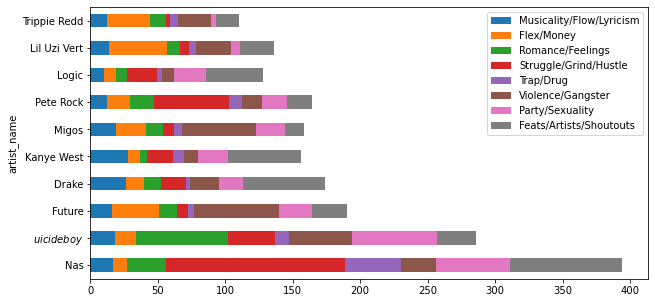

In [20]:
df_topics2.set_index('artist_name').iloc[:,:-1].plot(kind='barh', stacked=True,figsize=(10,5))

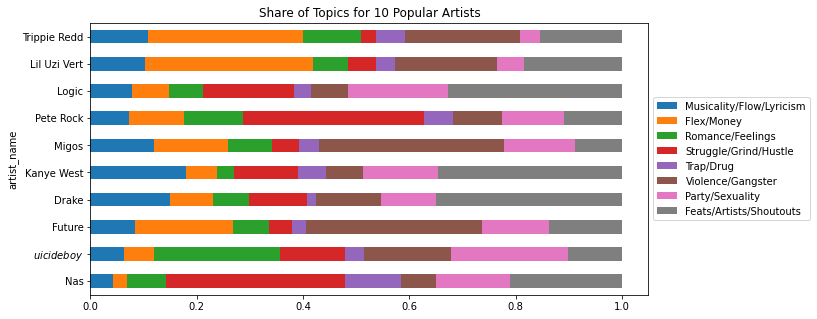

In [21]:

pd.concat([df_topics2.iloc[:,0],
df_topics2.iloc[:,1:-1].div(df_topics2.iloc[:,1:-1].sum(axis=1), axis=0) ],
          axis=1 ).set_index('artist_name').plot(kind='barh', title='Share of Topics for 10 Popular Artists', stacked=True,figsize=(10,5), ).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [22]:
# For NAS

In [23]:
df =  pd.read_pickle('df_nas_topics.pickle')

In [24]:
df1 = df.iloc[:,-6:].copy()

In [25]:
df1

,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
0,0.000025,0.000025,0.000025,0.000025,0.999877,0.000025
1,0.000036,0.000036,0.000036,0.999818,0.000036,0.000036
2,0.000068,0.262133,0.000068,0.737593,0.000068,0.000068
4,0.000075,0.999624,0.000075,0.000075,0.000075,0.000075
5,0.000033,0.999836,0.000033,0.000033,0.000033,0.000033
...,...,...,...,...,...,...
192,0.000041,0.287811,0.000041,0.634054,0.078013,0.000041
193,0.000042,0.999792,0.000042,0.000042,0.000042,0.000042
194,0.999792,0.000042,0.000042,0.000042,0.000042,0.000042
195,0.000023,0.000023,0.000023,0.999885,0.000023,0.000023


In [26]:
df_ranked = df1.rank(axis=1, method='min', ascending=False)
df_ranked = (df_ranked <= 2).astype(int)
df_topics = df[['track_release_year']].join(df_ranked)

In [27]:
df_topics

,track_release_year,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
0,2001,1,1,1,1,1,1
1,2007,1,1,1,1,1,1
2,2004,0,1,0,1,0,0
4,2018,1,1,1,1,1,1
5,1999,1,1,1,1,1,1
...,...,...,...,...,...,...,...
192,2002,0,1,0,1,0,0
193,2004,1,1,1,1,1,1
194,2020,1,1,1,1,1,1
195,2012,1,1,1,1,1,1


In [28]:
df_topics = df_topics.groupby('track_release_year').sum()

In [29]:
df_topics

,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
track_release_year,,,,,,
1999,20,22,21,20,22,21
2001,6,7,8,7,8,6
2002,16,19,17,17,19,18
2003,7,7,7,7,7,7
2004,14,16,15,16,16,15
2007,13,15,16,15,14,13
2008,12,13,13,12,11,11
2012,15,16,16,16,15,14
2014,7,7,9,9,9,7


In [30]:
df_topics = df_topics.div(df_topics.sum(axis=1), axis=0)

In [31]:
df_topics

,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
track_release_year,,,,,,
1999,0.158730,0.174603,0.166667,0.158730,0.174603,0.166667
2001,0.142857,0.166667,0.190476,0.166667,0.190476,0.142857
2002,0.150943,0.179245,0.160377,0.160377,0.179245,0.169811
2003,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2004,0.152174,0.173913,0.163043,0.173913,0.173913,0.163043
2007,0.151163,0.174419,0.186047,0.174419,0.162791,0.151163
2008,0.166667,0.180556,0.180556,0.166667,0.152778,0.152778
2012,0.163043,0.173913,0.173913,0.173913,0.163043,0.152174
2014,0.145833,0.145833,0.187500,0.187500,0.187500,0.145833


In [32]:
df_topics

,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
track_release_year,,,,,,
1999,0.158730,0.174603,0.166667,0.158730,0.174603,0.166667
2001,0.142857,0.166667,0.190476,0.166667,0.190476,0.142857
2002,0.150943,0.179245,0.160377,0.160377,0.179245,0.169811
2003,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2004,0.152174,0.173913,0.163043,0.173913,0.173913,0.163043
2007,0.151163,0.174419,0.186047,0.174419,0.162791,0.151163
2008,0.166667,0.180556,0.180556,0.166667,0.152778,0.152778
2012,0.163043,0.173913,0.173913,0.173913,0.163043,0.152174
2014,0.145833,0.145833,0.187500,0.187500,0.187500,0.145833


In [33]:
df_topics = df_topics[df_topics.index > 1989].reset_index()

In [34]:
df_topics

,track_release_year,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
0,1999,0.158730,0.174603,0.166667,0.158730,0.174603,0.166667
1,2001,0.142857,0.166667,0.190476,0.166667,0.190476,0.142857
2,2002,0.150943,0.179245,0.160377,0.160377,0.179245,0.169811
3,2003,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,2004,0.152174,0.173913,0.163043,0.173913,0.173913,0.163043
5,2007,0.151163,0.174419,0.186047,0.174419,0.162791,0.151163
6,2008,0.166667,0.180556,0.180556,0.166667,0.152778,0.152778
7,2012,0.163043,0.173913,0.173913,0.173913,0.163043,0.152174
8,2014,0.145833,0.145833,0.187500,0.187500,0.187500,0.145833
9,2018,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [35]:
df_topics.rolling(window=3).mean().dropna()

,track_release_year,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
2,2000.666667,0.150844,0.173505,0.172507,0.161925,0.181442,0.159778
3,2002.000000,0.153489,0.170860,0.172507,0.164570,0.178796,0.159778
4,2003.000000,0.156595,0.173275,0.163363,0.166986,0.173275,0.166507
5,2004.666667,0.156668,0.171666,0.171919,0.171666,0.167790,0.160291
6,2006.333333,0.156668,0.176296,0.176549,0.171666,0.163161,0.155661
7,2009.000000,0.160291,0.176296,0.180172,0.171666,0.159537,0.152038
8,2011.333333,0.158514,0.166767,0.180656,0.176027,0.167774,0.150262
9,2014.666667,0.158514,0.162138,0.176027,0.176027,0.172403,0.154891
10,2017.000000,0.158430,0.162306,0.172319,0.176195,0.172319,0.158430
11,2019.000000,0.157438,0.173219,0.157438,0.185124,0.169343,0.157438


In [36]:
df_topics_smoothed = df_topics.iloc[:,1:].rolling(window=3).mean().dropna()

In [37]:
df_topics_smoothed

,Violence/Gangster,Self-Evolution/Struggle,Politics/Revolution,Misc,Money,Religion/Spirituality
2,0.150844,0.173505,0.172507,0.161925,0.181442,0.159778
3,0.153489,0.170860,0.172507,0.164570,0.178796,0.159778
4,0.156595,0.173275,0.163363,0.166986,0.173275,0.166507
5,0.156668,0.171666,0.171919,0.171666,0.167790,0.160291
6,0.156668,0.176296,0.176549,0.171666,0.163161,0.155661
7,0.160291,0.176296,0.180172,0.171666,0.159537,0.152038
8,0.158514,0.166767,0.180656,0.176027,0.167774,0.150262
9,0.158514,0.162138,0.176027,0.176027,0.172403,0.154891
10,0.158430,0.162306,0.172319,0.176195,0.172319,0.158430
11,0.157438,0.173219,0.157438,0.185124,0.169343,0.157438


In [38]:
topics = df_topics_smoothed.columns.values

In [39]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.update_layout(yaxis_range=[0.1,0.2])

for t in topics:
    if t in ['Misc']:
        continue
    fig.add_trace(go.Scatter(x=df_topics.track_release_year, y=df_topics_smoothed[t], name=t,
                    text=["tweak line smoothness<br>with 'smoothing' in line object"],
                    hoverinfo='text+name',
                    line_shape='spline'))
    
    
fig.update_layout(
    title="Topics Prevalence through the years (Nas)",
    xaxis_title="Year",
    yaxis_title="Relative Freq.")
    
fig.show()